In [1]:
#Imported dependencies.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
#Created engine to hawaii.sqlite.
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#Reflected an existing database into a new model.
Base = automap_base()

#Reflected the tables.
Base.prepare(engine, reflect=True)

In [4]:
#Viewed all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [5]:
#Saved references to each table.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
#Created our session (link) from Python to the DB.
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
#Found the most recent date in the data set.
a = session.query(Measurement.date)
b = a.order_by(Measurement.date.desc())
most_recent_date = b.first().date
print(most_recent_date)

2017-08-23


In [8]:
#Designed a query to retrieve the last 12 months of precipitation data and plotted the results, starting from the most recent data point in the database. 

#Calculated the date one year from the last date in data set.
year = most_recent_date[0:4]
month = most_recent_date[5:7]
day = most_recent_date[8:10]
most_recent_date = dt.date(int(year), int(month), int(day))
one_year_past_date = most_recent_date - dt.timedelta(days=365)
one_year_past_date

datetime.date(2016, 8, 23)

In [9]:
#Performed a query to retrieve the date and precipitation scores.
c = session.query(Measurement.date, Measurement.prcp)
prcp_data = c.filter(Measurement.date >= one_year_past_date)

#Saved the query results as a Pandas DataFrame and set the index to the date column.
df = pd.DataFrame(prcp_data, columns=["Date", "Precipitation"]).set_index("Date")

#Sorted the dataframe by date.
df = df.sort_values("Date")
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:title={'center':'Past Year of Precipitation'}, xlabel='Date', ylabel='Inches'>

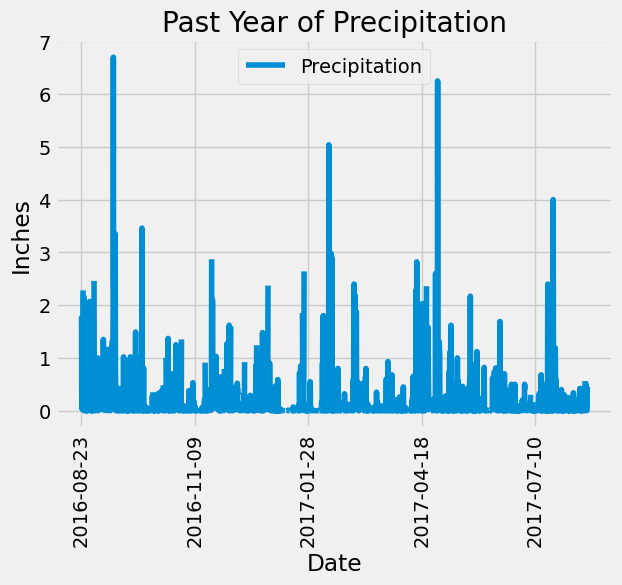

In [10]:
#Used Pandas Plotting with Matplotlib to plot the data.
df.plot(
    xlabel = "Date",
    ylabel = "Inches",
    title = "Past Year of Precipitation",
    rot = 90)

In [11]:
#Used Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
results = [r.station for r in session.query(Station.station)]
results

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [13]:
d = session.query(Station.station)
e = d.filter(Station.station == Measurement.station)
f = e.group_by(Station.station)
station_data = f.order_by(func.count(Measurement.station).desc()).all()
station_data

[('USC00519281',),
 ('USC00519397',),
 ('USC00513117',),
 ('USC00519523',),
 ('USC00516128',),
 ('USC00514830',),
 ('USC00511918',),
 ('USC00517948',),
 ('USC00518838',)]

In [14]:
#Designed a query to calculate the total number stations in the dataset.
session.query(Station.station).count()

9

In [15]:
#Designed a query to find the most active stations (i.e. what stations have the most rows?).
#Listed the stations and the counts in descending order.
d = session.query(Station.station, func.count(Measurement.station))
e = d.filter(Station.station == Measurement.station)
f = e.group_by(Station.station)
station_data = f.order_by(func.count(Measurement.station).desc()).all()
station_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#Using the most active station id from the previous query, calculated the lowest, highest, and average temperature.
most_active_station = station_data[0][0]
low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

print(f"Lowest Temp = {low}, Highest Temp = {high}, Average Temp = {avg}")

Lowest Temp = 54.0, Highest Temp = 85.0, Average Temp = 71.66378066378067


In [17]:
#Using the most active station id, queried the last 12 months of temperature observation data for this station and plotted the results as a histogram

#Found the most recent date, at the most active station, in the data set.
g = session.query(Measurement.date)
h = g.filter(Measurement.station == most_active_station)
i = h.order_by(Measurement.date.desc())
most_recent_date2 = i.first().date
print(most_recent_date2)

2017-08-18


In [18]:
#Calculated the date one year from the last date in data set from the most active station.
year2 = most_recent_date2[0:4]
month2 = most_recent_date2[5:7]
day2 = most_recent_date2[8:10]
most_recent_date2 = dt.date(int(year2), int(month2), int(day2))
one_year_past_date2 = most_recent_date2 - dt.timedelta(days=365)
one_year_past_date2

datetime.date(2016, 8, 18)

In [19]:
#Performed a query to retrieve the dates and temperatures of the past year at the most active station.
j = session.query(Measurement.date, Measurement.tobs)
k = j.filter(Measurement.date >= one_year_past_date2).filter(Measurement.station == most_active_station)

#Saved the query results as a Pandas DataFrame and set the index to the date column.
df2 = pd.DataFrame(k, columns = ["Date", "Temp"]).set_index("Date")
df2

,Temp
Date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 0, 'Temperatures')

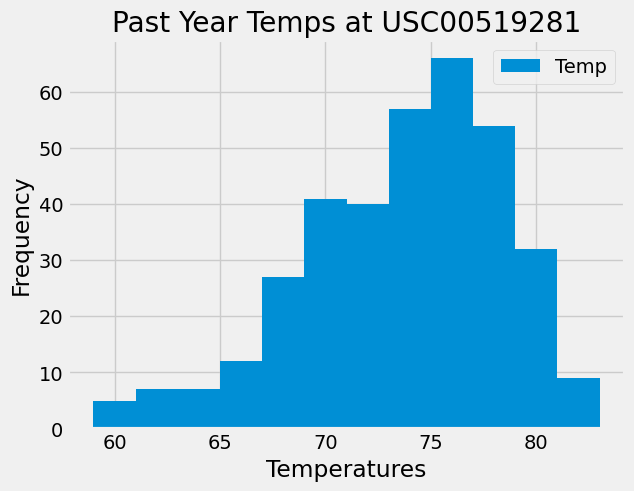

In [20]:
#Used Pandas Plotting with Matplotlib to plot the data.
df2.plot.hist(title = "Past Year Temps at USC00519281", bins =12)
plt.xlabel("Temperatures")

# Close session

In [21]:
#Closed Session
session.close()